## 13. Statistical Decision Theory

### 13.1 Preliminaries

**Decision theory** is a formal theory for comparing between statistical procedures.

In the language of decision theory, a estimator is sometimes called a **decision rule** and the possible values of the decision rule are called **actions**.

We shall measure the discrepancy between $\theta$ and $\hat{\theta}$ using a **loss function** $L(\theta, \hat{\theta})$.  Formally, $L$ maps $\Theta \times \Theta$ into $\mathbb{R}$.

The **risk** of an estimator $\hat{\theta}$ is

$$ R(\theta, \hat{\theta}) = \mathbb{E}_\theta \left( L(\theta, \hat{\theta}) \right)
= \int L(\theta, \hat{\theta}(x)) f(x; \theta) dx$$

When the loss function is squared error, then the risk is just the mean squared error:

$$R(\theta, \hat{\theta}) = \mathbb{E}_\theta(\hat{\theta} - \theta)^2 = \text{MSE} = \mathbb{V}_\theta(\hat{\theta}) + \text{bias}_\theta^2(\hat{\theta})$$

In the rest of chapter, if the risk function is not specified, assume the loss function is the squared error.

### 13.2 Comparing Risk Functions

The **maximum risk** is

$$ \overline{R}(\hat{\theta}) = \sup_\theta R(\theta, \hat{\theta})$$

and the **Bayes risk** is

$$ r(\pi, \hat{\theta}) = \int R(\theta, \hat{\theta}) \pi(\theta) d\theta$$

where $\pi(\theta)$ is a prior for $\theta$.

An estimator that minimizes the maximum risk is called a **minimax rule**. Formally, $\hat{\theta}$ is minimax if

$$R(\theta, \hat{\theta}) = \inf_{\overline{\theta}} \sup_\theta R(\theta, \hat{\theta})$$

where the infimum is over all estimators $\overline{\theta}$.

A decision rule that minimizes the Bayes risk is called a **Bayes rule**. Formally, $\hat{\theta}$ is a Bayes rule for prior $\pi$ if

$$R(\theta, \hat{\theta}) = \inf_{\overline{\theta}} r(\pi, \overline{\theta})$$

where the infimum is over all estimators $\overline{\theta}$.

### 13.3 Bayes Estimators

Let $\pi$ be a prior.  From Bayes' theorem, the posterior density is

$$f(\theta | x) = \frac{f(x | \theta) \pi(\theta)}{m(x)} = \frac{f(x | \theta) \pi(\theta)}{\int f(x | \theta) \pi(\theta) d\theta} $$

where $m(x) = \int f(x, \theta) d\theta = \int f(x | \theta) \pi(\theta) d\theta$ is the **marginal distribution** of $X$.  Define the **posterior risk** of an estimator $\hat{\theta}(x)$ by

$$r(\hat{\theta} | x) = \int L(\theta, \hat{\theta}(x)) f(\theta | x) d\theta$$

**Theorem 13.8**.  The Bayes risk $r(\pi, \hat{\theta})$ satisfies

$$r(\pi, \hat{\theta}) = \int r(\hat{\theta} | x) m(x) dx$$

Let $\hat{\theta}(x)$ be the value of $\theta$ that minimizes $r(\hat{\theta} | x)$.  Then $\hat{\theta}$ is the Bayes estimator.

**Proof**.  We can rewrite the Bayes risk as:

$$
\begin{align}
r(\pi, \hat{\theta}) &= \int R(\theta, \hat{\theta}) \pi(\theta) d\theta \\
&= \int \left( \int L(\theta, \hat{\theta}(x)) f(x | \theta) dx \right) \pi(\theta) d\theta \\
&= \int \int L(\theta, \hat{\theta}(x)) f(x, \theta) dx d\theta \\
&= \int \int L(\theta, \hat{\theta}(x)) f(\theta | x) m(x) dx d\theta \\
&= \int \left(\int L(\theta, \hat{\theta}(x) f(\theta | x) d\theta \right) m(x) dx \\
&= \int r(\hat{\theta} | x) m(x) dx
\end{align}
$$

If $\hat{\theta} = \text{argmin}_\theta r(\hat{\theta} | x)$ then we will minimize the integrand at every $x$ and thus minimize the integral $\int r(\hat{\theta} | x)m(x) dx$.

**Theorem 13.9**.  If $L(\theta, \hat{\theta}) = (\theta - \hat{\theta})^2$ then the Bayes estimator is

$$\hat{\theta}(x) = \int \theta f(\theta | x) d\theta = \mathbb{E}(\theta | X = x)$$

If $L(\theta, \hat{\theta}) = |\theta - \hat{\theta}|$ then the Bayes estimator is the median of the posterior $f(\theta | x)$.  If $L(\theta, \hat{\theta})$ is zero-one loss, then the Bayes estimator is the mode of the posterior $f(\theta | x)$.

**Proof**.  We will prove the theorem for the squared error loss.  The Bayes rule $\hat{\theta}$ minimizes $r(\theta | x) = \int (\theta - \hat{\theta}(x))^2 f(\theta | x) d\theta$. Taking the derivative of $r(\hat{\theta} | x)$ with respect to $\hat{\theta}(x)$ and setting it to 0 yields the equation $2 \int (\theta - \hat{\theta}(x)) f(\theta | x) d\theta = 0$.  Solving for $\hat{\theta}(x)$ we get the given estimator.

### 13.4 Minimax Rules

The problem of Minimax Rules is complicated and a complete coverage of that theory will not be attempted here, but a few key results will be mentioned.  Main takeaway message from this section:  Bayes estimators with a constant risk function are minimax.

**Theorem 13.11**.  Let $\hat{\theta}^\pi$ be the Bayes rule for some prior $\pi$:

$$r(\pi, \hat{\theta}^\pi) = \inf_{\hat{\theta}} r(\pi, \hat{\theta})$$

Suppose that

$$R(\theta, \hat{\theta}^\pi) \leq r(\pi, \hat{\theta}^\pi) \;\text{for all } \theta$$

Then $\hat{\theta}^\pi$ is minimax and $\pi$ is called a **least favorable prior**.

**Proof**.  Suppose that $\hat{\theta}^\pi$ is not minimax. Then there is another rule $\hat{\theta}_0$ such that $\sup_\theta R(\theta, \hat{\theta}_0) \leq \sup_\theta R(\theta, \hat{\theta}^\pi)$.  Since the average of a function is always less than or equal to its maximum, we have that $r(\theta, \hat{\theta}_0) \leq \sup_\theta R(\theta, \hat{\theta}_0)$.  Hence,

$$r(\theta, \hat{\theta}_0) \leq \sup_\theta R(\theta, \hat{\theta}_0) \leq \sup_\theta R(\theta, \hat{\theta}^\pi) \leq r(\pi, \hat{\theta}^\pi)$$

which contradicts $r(\pi, \hat{\theta}^pi) = \inf_{\hat{\theta}} r(\pi, \hat{\theta})$.

**Theorem 13.12**.  Suppose that $\hat{\theta}$ is the Bayes rule estimator with respect to some prior $\pi$.  Suppose further that $\hat{\theta}$ has constant risk: $R(\theta, \hat{\theta}) = c$ for some $c$.  Then $\hat{\theta}$ is minimax.

**Proof**.  The Bayes risk is $r(\pi, \hat{\theta}) = \int R(\theta, \hat{\theta}) \pi(\theta) d\theta = c$ and hence $R(\theta, \hat{\theta}) \leq r(\pi, \hat{\theta})$ for all $\theta$.  Now apply Theorem 13.11.

**Theorem 13.15**.  Let $X_1, \dots, X_n \sim N(\theta, 1)$ and let $\hat{\theta} = \overline{X}$. Then $\hat{\theta}$ is minimax with respect to any well-behaved loss function.  It is the only estimator with this property.

*Well-behaved means that the level sets must be convex and symmetric about the origin.  The result holds up to sets of measure 0.*

### 13.5  Maximum Likelihood, Minimax and Bayes

For parametric models that satisfy weak regularity conditions, the MLE is approximately minimax.  Consider squared error loss which is squared bias plus variance.  In parametric models with large samples, it can be shown that the variance term dominates the bias so the risk of the MLE $\hat{\theta}$ roughly equals the variance:

$$R(\theta, \hat{\theta}) = \mathbb{V}_\theta(\hat{\theta}) + \text{bias}^2 \approx \mathbb{V}_\theta(\hat{\theta})$$

*Typically, the squared bias is of order $O(n^{-2})$ while the variance is of order $O(n^{-1})$.*

As seen on the chapter on parametric models, the variance is approximately:

$$\mathbb{V}(\hat{\theta}) = \frac{1}{nI(\theta)}$$

where $I(\theta)$ is the Fisher information.  Hence,

$$ n R(\theta, \hat{\theta}) \approx \frac{1}{I(\theta)}$$

For any other estimator $\theta'$, it can be shown that, for large $n$,  $R(\theta, \theta') \geq R(\theta, \hat{\theta})$.  More precisely,

$$ \lim_{\epsilon \rightarrow 0} \limsup_{n \rightarrow \infty} \sup_{|\theta - \theta'| < \epsilon} n R(\theta', \hat{\theta}) \geq \frac{1}{I(\theta)} $$

This says that, in a local, large sample sense, the MLE is minimax.  It can also be shown that the MLE is approximately the Bayes rule.

In summary, in parametric models with large samples, the MLE is approximately minimax and Bayes.  There is a caveat:  these results break down when the number of parameters is large.

### 13.6  Admissibility

An estimator $\hat{\theta}$ is **inadmissible** if there exists another rule $\hat{\theta}'$ such that

$$
\begin{align}
R(\theta, \hat{\theta}') \leq R(\theta, \hat{\theta}) & \quad \text{for all } \theta \text{ and} \\
R(\theta, \hat{\theta}') < R(\theta, \hat{\theta}) & \quad \text{for at least one } \theta
\end{align}
$$

A prior has **full support** if for every $\theta$ and every $\epsilon > 0$, $\int_{\theta - \epsilon}^{\theta + \epsilon} \pi(\theta) d\theta > 0$.

**Theorem 13.20 (Bayes' rules are admissible)**. Suppose that $\theta \subset \mathbb{R}$ and that $R(\theta, \hat{\theta})$ is a continuous function of $\theta$ for every $\hat{\theta}$.  Let $\pi$ be a prior density with full support and let $\hat{\theta}^\pi$ be the Bayes' rule.  If the Bayes risk is finite then $\hat{\theta}^\pi$ is admissible.

**Proof**.  Suppose $\hat{\theta}^\pi$ is inadmissible.  Then there exists a better rule $\hat{\theta}$ such that $R(\theta, \hat{\theta}) \leq R(\theta, \hat{\theta}^\pi)$ for all $\theta$ and $(\theta_0, \hat{\theta}) < R(\theta_0, \hat{\theta}^\pi)$ for some $\theta_0$.  Let $v = R(\theta_0, \hat{\theta}^\pi) - R(\theta_0, \hat{\theta}) > 0$.  Since $R$ is continuous, there is an $\epsilon > 0$ such that $R(\theta, \hat{\theta}^\pi) - R(\theta_0, \hat{\theta}) > v/2$ for all $\theta \in (\theta_0 - \epsilon, \theta_0 + \epsilon)$.  Now,

$$
\begin{align}
r(\pi, \hat{\theta}^{\pi}) - r(\pi, \hat{\theta}) &= \int R(\theta, \hat{\theta}^\pi) \pi(\theta) d\theta - \int R(\theta, \hat{\theta}) \pi(\theta) d\theta \\
&= \int \left[ R(\theta, \hat{\theta}^\pi) - R(\theta, \hat{\theta})\right] \pi(\theta) d\theta \\
&\geq \int_{\theta_0 - \epsilon}^{\theta_0 + \epsilon} \left[ R(\theta, \hat{\theta}^\pi) - R(\theta, \hat{\theta})\right] \pi(\theta) d\theta \\
& \geq \frac{v}{2} \int_{\theta_0 - \epsilon}^{\theta_0 + \epsilon} \pi(\theta) d\theta \\
& > 0
\end{align}
$$

Hence $r(\pi, \hat{\theta}^\pi) > r(\pi, \hat{\theta})$.  This implies that $\hat{\theta}^\pi$ does not minimize $r(\pi, \hat{\theta})$, which contradicts the fact that $\hat{\theta}^\pi$ is the Bayes rule.

**Theorem 13.21**.  Let $X_1, \dots, X_n \sim N(\mu, \sigma^2)$.  Under squared error loss, $\overline{X}$ is admissible.

The proof of this theorem is very technical and ommitted.  Outline:  the posterior mean is admissible for any strictly positive prior.  Take the prior to be $N(a, b^2)$.  When $b^2$ is very large, the posterior mean is approximately equal to $\overline{X}$.

In general, a rule may be minimax, admissible, both, or neither.  Here are some facts linking admissibility and minimaxity.

**Theorem 13.22**.  Suppose that $\hat{\theta}$ has constant risk and is admissible.  Then it is minimax.

**Proof**.  The risk is $R(\theta, \hat{\theta}) = c$ for some constant $c$.  If $\hat{\theta}$ were not minimax then there exists a rule $\hat{\theta}'$ that further reduces the risk,

$$R(\theta, \hat{\theta}') \leq \sup_{\theta} R(\theta, \hat{\theta}') < \sup_{\theta} R(\theta, \hat{\theta}) = c$$

But that would imply that $\hat{\theta}$ is inadmissible.

**Theorem 13.23**.  Let $X_1, \dots, X_n \sim N(\theta, 1)$.  Then, under squared error loss, $\hat{\theta} = \overline{X}$ is minimax.

**Proof**.  According to Theorem 13.21, $\hat{\theta}$ is admissible.  The risk of $\hat{\theta}$ is $1/n$ which is constant.  According to Theorem 13.22, it is also minimax.

Although miminax rules are not guaranteed to be admissible they are "close to admissible".  Say $\hat{\theta}$ is **strongly inadmissible** if there is a rule $\hat{\theta}'$ and an $\epsilon > 0$ such that $R(\theta, \hat{\theta}') < R(\theta, \hat{\theta}) - \epsilon$ for all $\theta$.

**Theorem 13.24**.  If $\hat{\theta}$ is minimax then it is not strongly inadmissible.

### 13.7 Stein's Paradox

Suppose that $X \sim N(0, 1)$ and consider estimating $\theta$ with squared error loss.  From the previous section we know that $\hat{\theta}(X) = X$ is admissible.  

Now consider estimating two, unrelated quantities $\theta = (\theta_1, \theta_2)$ and suppose that $X_1 \sim N(\theta_1, 1)$ and $X_2 \sim N(\theta_2, 1)$ independently, with loss $L(\theta, \hat{\theta}) = \sum_{j=1}^2 (\theta_j - \hat{\theta}_j)^2$.  Not surprisingly, $\hat{\theta}(X) = X$ is again admissible, where $X = (X_1, X_2)$.

Now consider the generalization to $k$ normal means.  Let $\theta = (\theta_1, \dots, \theta_k)$, $X = (X_1, \dots, X_k)$ with $X_i \sim N(\theta_i, 1)$ (independently) and loss $L(\theta, \hat{\theta}) = \sum_{j=1}^k (\theta_j - \hat{\theta}_j)^2$.

Stein astounded everyone when he proved that, if $k \geq 3$, then $\hat{\theta}(X) = X$ is inadmissible.  It can be shown that the following estimator, known as the James-Stein estimator, has smaller risk:

$$\hat{\theta}_S(X) = \left(1 - \frac{k-2}{\sum_i X_i^2} \right)^+ X_i$$

where $(z)^+ = \max \{z, 0\}$.  This estimator shrinks the $X_i$'s towards 0.  The message is that, when estimating many parameters, there is great value in "shrinking" the estimates.  This observation plays an important role in modern nonparametric function estimation.

### 13.9 Exercises

**13.9.1**.  In each of the following models, find the Bayes risk and the Bayes estimator, using squared error loss.

**(a)** $X \sim \text{Binomial}(n, p)$, $p \sim \text{Beta}(\alpha, \beta)$.

**(b)** $X \sim \text{Poisson}(\lambda)$, $\lambda \sim \text{Gamma}(\alpha, \beta)$.

**(c)** $X \sim N(\theta, \sigma^2)$ where $\sigma^2$ is known and $\theta \sim N(a, b^2)$.

**Solution**

We can determine the posterior distribution, since its proportional to the likelihood times the prior, $f(\theta | X) \propto \mathcal{L}(\theta) f(\theta)$.  But when using the square loss, the Bayes estimator is the mean of the posterior (from Theorem 13.9).  So we can then get the Bayes estimator as $\hat{\theta} = \mathbb{E}[\theta | X]$.

**(a)** 

$$
\begin{align}
f(\theta | X) &\propto \mathcal{L}(\theta) f(\theta) \\
&= \prod_{i = 1}^N \left( \binom{N}{X_i} p^{X_i}(1 - p)^{n - X_i} \right) \frac{p^{\alpha - 1}(1-p)^{\beta - 1}}{B(\alpha, \beta)} \\
& \propto p^{(\alpha - 1) + \sum_i X_i} (1 - p)^{(\beta - 1) + \sum_i (n - X_i)} \\
&= p^{\left(\alpha + N \overline{X}_N \right) - 1} (1 - p)^{\left(\beta + N(n - \overline{X}_N) \right)- 1}
\end{align}
$$

So the posterior is proportional to, and drawn from, a Beta distribution:

$$ \theta | X \sim \text{Beta}\left(\alpha + N \overline{X}, \beta + N(n - \overline{X}) \right)$$

The mean of the Beta distribution with parameters $\alpha_p, \beta_p$ is $\alpha_p / (\alpha_p + \beta_p)$, so the posterior mean (and the Bayes estimator) is:

$$ \hat{\theta}(X) = \frac{\alpha + N \overline{X}}{\alpha + \beta + Nn} $$


The Bayes risk for an arbitrary estimator $\tilde{\theta}$, given a prior $\pi(\theta)$ that $\theta \sim \text{Beta}(\alpha, \beta)$ is:

$$
\begin{align}
r(\pi, \tilde{\theta}) &= \int R(\theta, \tilde{\theta}) \pi(\theta) d\theta \\
&= \int (\tilde{\theta} - \theta)^2 \frac{\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d\theta \\
&= \tilde{\theta}^2 \int \frac{\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d\theta
- 2 \tilde{\theta} \int \theta \frac{\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d\theta
+ \int \theta^2 \frac{\theta^{\alpha - 1}(1 - \theta)^{\beta - 1}}{B(\alpha, \beta)} d\theta \\
&= \tilde{\theta}^2 \mathbb{E}_\pi[1] - 2 \tilde{\theta} \mathbb{E}_\pi[\theta] + \mathbb{E}_\pi[\theta^2]  \\
&= \tilde{\theta}^2 \cdot 1 - 2 \tilde{\theta} \mathbb{E}_\pi[\theta] + \mathbb{V}_\pi[\theta] + \mathbb{E}_\pi[\theta]^2 \\ 
&= \tilde{\theta}^2 - 2 \tilde{\theta} \frac{\alpha}{\alpha + \beta}
+ \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)} + \frac{\alpha^2}{(\alpha + \beta)^2} \\
&= \tilde{\theta}^2 - 2 \tilde{\theta} \frac{\alpha}{\alpha + \beta}
+ \frac{\alpha\beta + \alpha^2(\alpha + \beta + 1)}{(\alpha + \beta)^2(\alpha + \beta + 1)}
\end{align}
$$

Including the observations from $X$, the prior is modified to a different Beta distribution, replacing $\alpha$ by $\alpha + N \overline{X}$ and $\beta$ by $\beta + N(n - \overline{X})$.

**(b)**

$$
\begin{align}
f(\theta | X) &\propto \mathcal{L}(\theta ) f(\theta) \\
&= \prod_{i = 1}^N \left( \frac{\lambda^X_i e^{-\lambda}}{X_i!} \right) \frac{\beta^\alpha}{\Gamma(\alpha)}\lambda^{\alpha - 1}e^{-\beta \lambda} \\
& \propto \lambda^{\sum_i X_i} e^{-N \lambda} \lambda^{\alpha - 1} e^{-\beta \lambda} \\
&= \lambda^{\left(\alpha + N \overline{X}\right) - 1} e^{-(\beta + N) \lambda}
\end{align}
$$

So the posterior is proportional to, and drawn from, a Gamma distribution:

$$ \theta | X \sim \text{Gamma}\left(\alpha + N \overline{X}, \beta + N \right)$$

The mean of the Gamma distribution with parameters $\alpha_p, \beta_p$ is $\alpha_p / \beta_p$, so the posterior mean (and the Bayes estimator) is:

$$ \hat{\theta}(X) = \frac{\alpha + N \overline{X}}{\beta + N} $$

The Bayes risk for an arbitrary estimator $\tilde{\theta}$, given a prior $\pi(\theta)$ that $\theta \sim \text{Gamma}(\alpha, \beta)$ is:

$$
\begin{align}
r(\pi, \tilde{\theta}) &= \int R(\theta, \tilde{\theta})\pi(\theta) d\theta \\
&= \int (\tilde{\theta} - \theta)^2 \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1}e^{-\beta \theta} d\theta \\
&= \tilde{\theta}^2 \int \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1}e^{-\beta \theta} d\theta
- 2 \tilde{\theta} \int \theta \frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1}e^{-\beta \theta} d\theta
+ \int \theta^2\frac{\beta^\alpha}{\Gamma(\alpha)} \theta^{\alpha - 1}e^{-\beta \theta} d\theta \\
&= \tilde{\theta}^2 \mathbb{E}_\pi[1] - 2 \tilde{\theta} \mathbb{E}_\pi[\theta] + \mathbb{E}_\pi[\theta^2] \\
&= \tilde{\theta}^2 \cdot 1 - 2 \tilde{\theta} \mathbb{E}_\pi[\theta] + \mathbb{V}_\pi[\theta] + \mathbb{E}_\pi[\theta]^2 \\
&= \tilde{\theta}^2 - 2 \tilde{\theta} \frac{\alpha}{\beta} + \frac{\alpha(\alpha + 1)}{\beta^2}
\end{align}
$$

Including the observations from $X$, the prior is modified to a different Gamma distribution, replacing $\alpha$ by $\alpha + N \overline{X}$ and $\beta$ by $\beta + N$.

**(c)**

$$
\begin{align}
f(\theta | X) &\propto \mathcal{L}(\theta | X) f(\theta) \\
&= \prod_{i = 1}^N \left( \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} \left(\frac{X_i - \theta}{\sigma} \right)^2} \right) \frac{1}{a \sqrt{2 \pi}} e^{-\frac{1}{2} \left( \frac{\theta - a}{b}\right)^2} \\
& \propto \exp \left\{ -\frac{1}{2} \left( \sum_{i=1}^N \left( \frac{X_i - \theta}{\sigma}\right)^2 + \left( \frac{\theta - a}{b}\right)^2 \right) \right\} \\
& = \exp \left\{-\frac{1}{2} \left( \theta^2 \left(\frac{N}{\sigma^2} + \frac{1}{b^2} \right) - 2 \theta \left( \frac{N \overline{X}}{\sigma^2} + \frac{a}{b^2} \right) + C\right) \right\} \\
& \propto \exp \left\{-\frac{1}{2} \left( \frac{Nb^2 + \sigma^2}{\sigma^2 b^2} \right)\left(\theta^2 - 2\theta \left(\frac{N b^2 \overline{X} + a \sigma^2}{N b^2 + \sigma^2} \right) \right) \right\} \\
& \propto \exp \left\{-\frac{1}{2} \left( \frac{Nb^2 + \sigma^2}{\sigma^2 b^2} \right) \left(\theta - \left(\frac{N b^2 \overline{X} + a \sigma^2}{N b^2 + \sigma^2} \right) \right)^2 \right\} \\
& = \exp \left\{-\frac{1}{2} \left(\frac{\theta - \left(\frac{N b^2 \overline{X} + a \sigma^2}{N b^2 + \sigma^2} \right)}{\sqrt{\frac{\sigma^2 b^2}{Nb^2 + \sigma^2}}} \right)^2 \right\} \\
& = \exp \left\{-\frac{1}{2} \left(\frac{\theta - \overline{\theta}}{w} \right)^2 \right\}
\end{align}
$$

where 

$$
\overline{\theta} = \frac{\sigma^2}{\sigma^2 + N b^2}a + \frac{Nb^2}{\sigma^2 + Nb^2}\overline{X}
\quad \text{and} \quad
w^2 = \frac{1}{N} \frac{1}{\frac{1}{\sigma^2} + \frac{1}{Nb^2}}
$$

So the posterior is proportional to, and drawn from, a Normal distribution:

$$ \theta | X \sim N(\overline{\theta}, w^2) $$

The mean of the Normal distribution is $\overline{\theta}$, so the mean of the posterior (and the Bayes estimator) is:

$$ \hat{\theta}(X) = \frac{\sigma^2}{\sigma^2 + N b^2}a + \frac{Nb^2}{\sigma^2 + Nb^2}\overline{X}$$

The Bayes risk for an arbitrary estimator $\tilde{\theta}$, given a prior $\pi(\theta)$ that $\theta \sim N(a, b^2)$ is:

$$
\begin{align}
r(\pi, \tilde{\theta}) &= \int R(\theta, \tilde{\theta}) \pi(\theta) d\theta \\
&= \int (\tilde{\theta} - \theta)^2 \frac{1}{b \sqrt{2 \pi}} \exp \left\{ -\frac{1}{2} \left(\frac{\theta - a}{b}\right)^2 \right\} d\theta \\
&= \tilde{\theta}^2 \int \frac{1}{b \sqrt{2 \pi}} \exp \left\{ -\frac{1}{2} \left(\frac{\theta - a}{b}\right)^2 \right\} d\theta
- 2 \tilde{\theta} \int \theta \frac{1}{b \sqrt{2 \pi}} \exp \left\{ -\frac{1}{2} \left(\frac{\theta - a}{b}\right)^2 \right\} d\theta
+ \int \theta^2 \frac{1}{b \sqrt{2 \pi}} \exp \left\{ -\frac{1}{2} \left(\frac{\theta - a}{b}\right)^2 \right\} d\theta \\
&= \tilde{\theta}^2 \mathbb{E}_\pi[1] - 2 \tilde{\theta} \mathbb{E}_\pi[\theta] + \mathbb{E}_\pi[\theta^2] \\
&= \tilde{\theta}^2 - 2 \tilde{\theta} \mathbb{E}_\pi[\theta] + \mathbb{V}_pi[\theta] + \mathbb{E}_\pi[\theta]^2 \\
&= \tilde{\theta}^2 - 2 \tilde{\theta} a + a^2 + b^2
\end{align}
$$

Including the observations from $X$, the prior is modified to a different Normal distribution, replacing $a$ with $\overline{\theta}$ and $b^2$ with $w^2$.

**Exercise 13.9.2**.  Let $X_1, \dots, X_n \sim N(\theta, \sigma^2)$ and suppose we estimate $\theta$ with loss function $L(\theta, \hat{\theta}) = (\theta - \hat{\theta})^2 / \sigma^2$.  Show that $\overline{X}$ is admissible and minimax.

**Solution**.

The risk for an estimator $\hat{\theta}$ is the risk for the same estimator using the mean squared error, but scaled by $1 / \sigma^2$:

$$
R_L(\theta, \hat{\theta}) = \mathbb{E}_\theta[L(\theta, \hat{\theta})] 
= \mathbb{E}_\theta\left[\left( \frac{\theta - \hat{\theta}}{\sigma} \right)^2 \right] 
= \frac{1}{\sigma^2} \mathbb{E}_\theta[ L_\text{MSE}(\theta, \hat{\theta})]  
= \frac{1}{\sigma^2} R_\text{MSE}(\theta, \hat{\theta})
$$

Since $\overline{X}$ is admissible and minimax for the MSE loss function, it follows it is also admissible and minimax for this rescaled loss function.

**Exercise 13.9.3**.  Let $\Theta = \{ \theta_1, \dots, \theta_k \}$ be a finite parameter space.  Prove that the posterior mode is the Bayes estimator under zero-one loss.

**Solution**.  The Bayes rule minimizes 

$$r(\hat{\theta} | x) = \int L(\theta, \hat{\theta}) f(\theta | x) d\theta = \sum_i I(\hat{\theta} \neq \theta_i) f(\theta_i | x) = 1 - \sum_i I(\hat{\theta} = \theta_i) f(\theta_i | x) = 1 - f(\hat{\theta} | X)$$

The posterior probability $f(\theta | X)$ is maximized on the posterior mode, $\hat{\theta} = \text{argmax}_\theta f(\theta | X)$, so the posterior mode is also the Bayes estimator under zero-one loss.

**Exercise 13.9.4 (Casella and Berger)**.  Let $X_1, \dots, X_n$ be a sample from a distribution with variance $\sigma^2$.  Consider estimators of the form $bS^2$ where $S^2$ is the sample variance.  Let the loss function for estimating $\sigma^2$ be

$$L(\sigma^2, \hat{\sigma}^2) = \frac{\hat{\sigma}^2}{\sigma^2} - 1 - \log \frac{\hat{\sigma^2}}{\sigma^2}$$

Find the optimal value of $b$ that minimizes the risk for all $\sigma^2$.

**Solution**.  For an estimator of the form $\hat{\sigma}^2 = bS^2$, the risk is

$$
\begin{align}
R(\sigma^2, bS^2) &= \mathbb{E}_{\sigma^2}[ L(\sigma^2, bS^2) ]\\
&=\mathbb{E}_{\sigma^2}\left[\frac{bS^2}{\sigma^2} - 1 - \log b - \log S^2 + \log \sigma^2 \right] \\
&= \frac{b}{\sigma^2} \mathbb{E}_{\sigma^2}[S^2] - 1 -\log b - \mathbb{E}_{\sigma^2}[\log S^2] + \log \sigma^2 \\
&= b - \log b + C
\end{align}
$$

where $C$ does not depend on $b$.  The risk is minimized when the derivative is zero, $1 - 1/b = 0$, or $b = 1$.

**Exercise 13.9.5 (Berliner, 1983)**.  Let $X \sim \text{Binomial}(n, p)$ and suppose the loss function is

$$ L(p, \hat{p}) = \left(1 - \frac{\hat{p}}{p} \right)^2$$

where $0 < p < 1$.  Consider the estimator $\hat{p}(X) = 0$.  This estimator falls outside of the parameter space $(0, 1)$ but we will allow this.  Show that $\hat{p}(X) = 0$ is the unique, minimax rule.

**Solution**.

For the estimator $\hat{p}(X) = 0$, the loss function is always 1, and so the risk is also always 1.

For any estimator $\tilde{p}$ that falls within the parameter space $(0, 1)$, we are interested in calculating its maximum risk, $\overline{R}(p, \tilde{p}) = \sup_p R(p, \tilde{p})$.

$$ 
\begin{align}
R(p, \tilde{p}) &= \mathbb{E}_p \left[\left(1 - \frac{\tilde{p}(X)}{p} \right)^2\right]\\
&=\mathbb{E}_p \left[1 + \frac{1}{p} (-2 \tilde{p}(X)) + \frac{1}{p^2} \tilde{p}(X)^2 \right] \\
&= 1 + \frac{1}{p} (-2 \mathbb{E}_p[\tilde{p}(X)]) + \frac{1}{p^2} \mathbb{E}_p[\tilde{p}(X)^2]
\end{align}
$$

For a specific estimator, we have the expectations as constants, $a = \mathbb{E}_p[\tilde{p}(X)]$ and $b = \mathbb{E}_p[\tilde{p}(X)^2]$.  We are interested in picking a $p \in (0, 1)$ such that this risk is greater than 1; we can always do $p = a / b < 2a / b$, since $a > 0$ due to the open interval constraint:

$$
\begin{align}
1 + \frac{1}{p} (-2a) + \frac{1}{p^2} b > 1 \\
\frac{1}{p} \left(-2a + \frac{1}{p} b \right) > 0 \\
p < \frac{2a}{b}
\end{align}
$$

Therefore, any estimator within the parameter space can produce a risk greater than 1, and it is not minimax as the estimator $\hat{p}(X)$ produces a smaller maximum risk.

**Exercise 13.9.6 (Computer Experiment)**.  Compare the risk of the MLE and the James-Stein estimator by simulation.  Try various values of $n$ and various vectors $\theta$.  Summarize your results.

**Solution**.

Let's plot the mean square error from running the simulation a large number of times for $k = 3, 10, 100, 1000$, assuming that $\theta$ is a vector of all ones.

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

from tqdm import notebook


# MLE estimator: just return the original values
def mle(X):
    return X

# James-Stein estimator: shrink towards zero
def james_stein(X):
    assert len(X) > 2
    return np.maximum(1 - ((len(X) - 2) / sum(X**2)), 0) * X

# Calculates the mean square error between two sequences
def mse(X_pred, X):
    return ((X - X_pred)**2).mean()

In [2]:
def plot_range(k, B=100000):
    error_mle = np.empty(B)
    error_js = np.empty(B)
    for i in notebook.tqdm(range(B)):
        theta = np.ones(k)
        X = norm.rvs(loc=1, scale=1, size=k)
        theta_hat_mle = mle(X)
        theta_hat_js = james_stein(X)
        error_mle[i] = mse(theta_hat_mle, theta)
        error_js[i] = mse(theta_hat_js, theta)

    plt.figure(figsize=(12, 8))
    plt.hist(error_mle, density=True, bins=100, histtype='step', color='blue', label='MLE, k = ' + str(k))
    plt.hist(error_js, density=True, bins=100, histtype='step', color='red', label='James-Stein, k = ' + str(k))
    plt.legend(loc='upper right')
    plt.show();

  0%|          | 0/100000 [00:00<?, ?it/s]

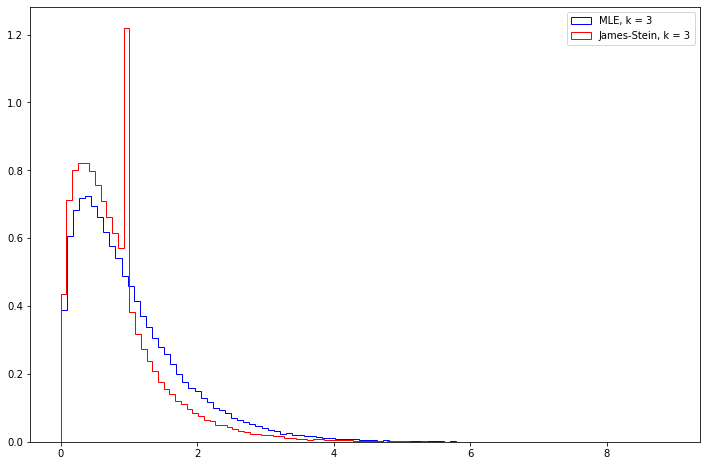

  0%|          | 0/100000 [00:00<?, ?it/s]

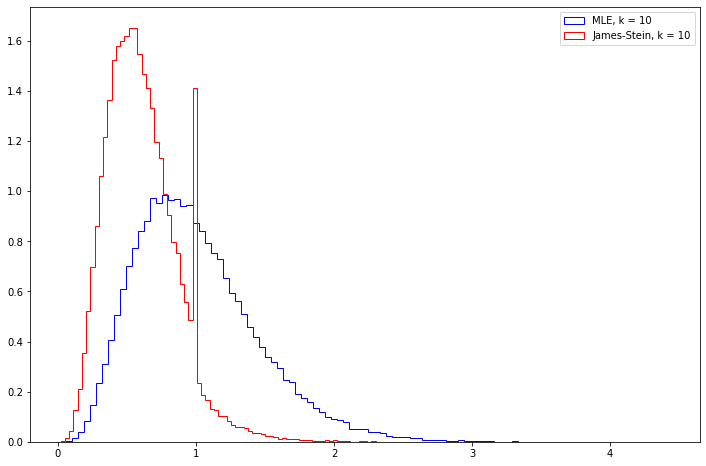

  0%|          | 0/100000 [00:00<?, ?it/s]

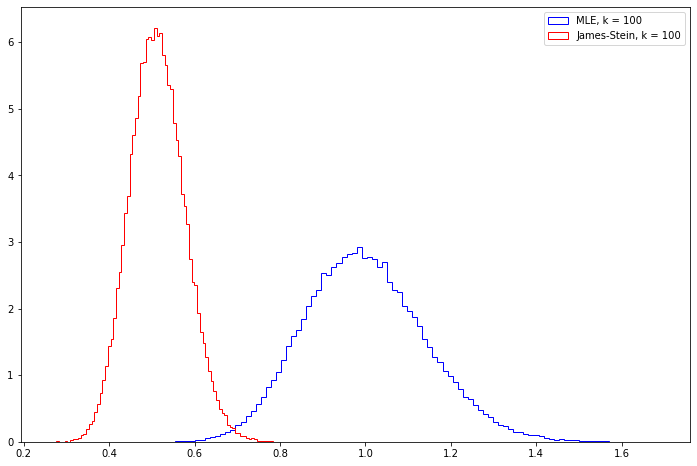

  0%|          | 0/100000 [00:00<?, ?it/s]

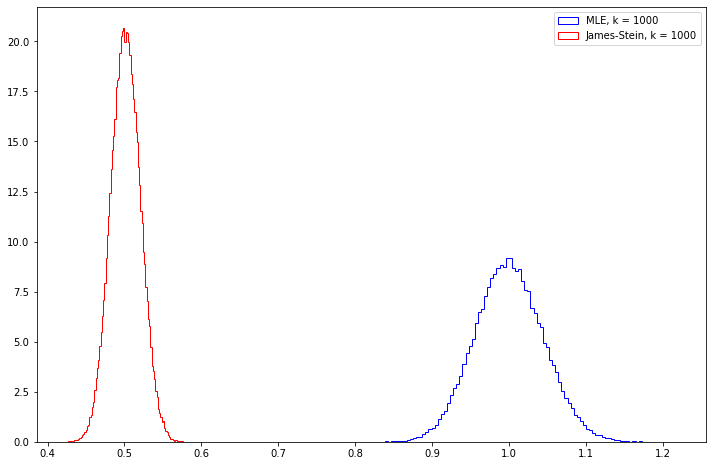

In [3]:
plot_range(3)
plot_range(10)
plot_range(100)
plot_range(1000)

Note that the James-Stein estimator seems to have its mean square error go towards 0.5, while the MLE estimator has its error go towards 1.